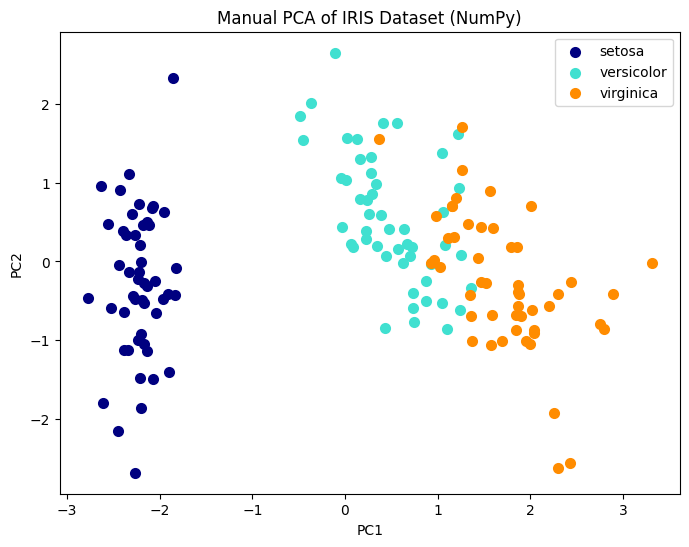

Explained variance ratio (manual): [0.72962445 0.22850762]


In [1]:
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Step 3: Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Step 4: Compute covariance matrix
cov_matrix = np.cov(X_std.T)

# Step 5: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 6: Sort eigenvalues and eigenvectors in descending order
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# Choose number of components (k=2)
k = 2
eigenvectors_subset = eigenvectors[:, :k]

# Step 7: Transform data into the new subspace
X_reduced = np.dot(X_std, eigenvectors_subset)

# Step 8: Plot PCA results
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']

for color, target_name, i in zip(colors, target_names, [0, 1, 2]):
    plt.scatter(
        X_reduced[y == i, 0],
        X_reduced[y == i, 1],
        color=color,
        lw=2,
        label=target_name
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Manual PCA of IRIS Dataset (NumPy)")
plt.legend()
plt.show()

# Step 9: Print explained variance ratio
explained_variance = eigenvalues / np.sum(eigenvalues)
print("Explained variance ratio (manual):", explained_variance[:k])